In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datatran2022.csv', encoding='ISO-8859-1', sep=';', decimal=',')

In [4]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

# Principais Causas de Acidente no Brasil

In [5]:
df_grouped = df.groupby('causa_acidente').size().rename('qtd').reset_index()

In [6]:
df_grouped.sort_values('qtd', inplace=True, ascending=False)

In [7]:
df_grouped = df_grouped.head(20)

In [8]:
from matplotlib.pyplot import figure

In [9]:
plt.rcParams["figure.figsize"] = (20,15)

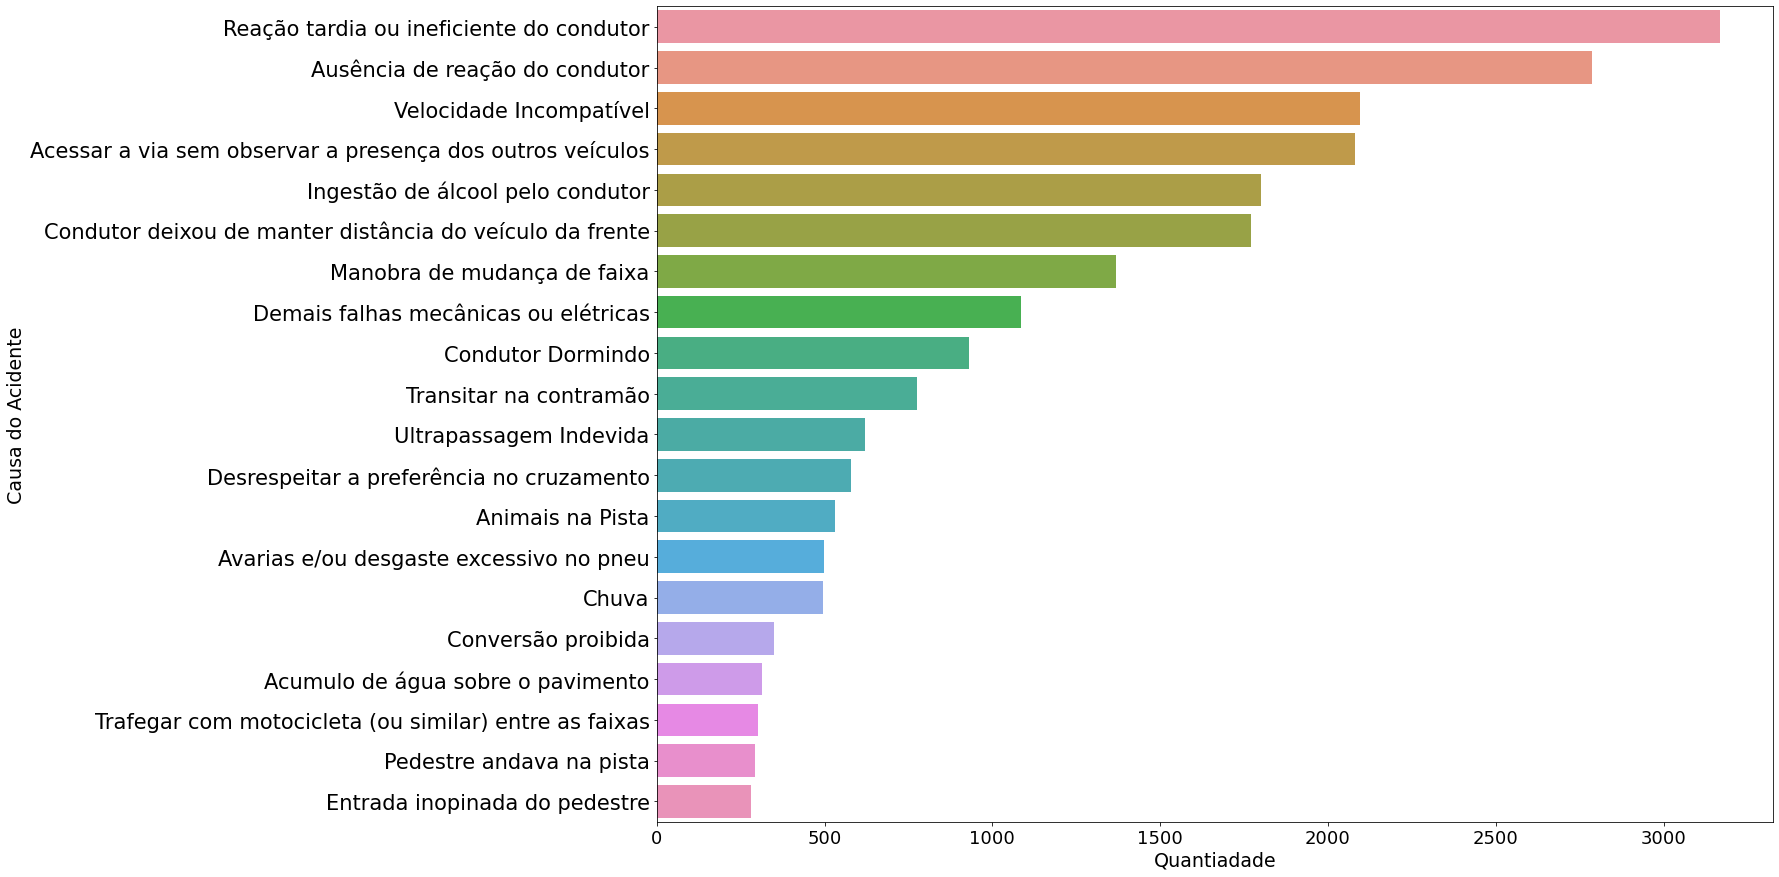

In [10]:
sns.barplot(y=df_grouped['causa_acidente'], x=df_grouped['qtd'], orient="h")
plt.yticks(fontsize=21)
plt.xticks(fontsize=18)
plt.xlabel("Quantiadade", fontsize=19)
plt.ylabel("Causa do Acidente", fontsize=19)
plt.show()

# Dias da semana com mais acidentes no Brasil

In [11]:
df_grouped_week = df.groupby('dia_semana').size().rename('qtd').reset_index()

In [12]:
df_grouped_week.sort_values('qtd', inplace=True, ascending=False)

In [13]:
plt.rcParams["figure.figsize"] = (14,7)

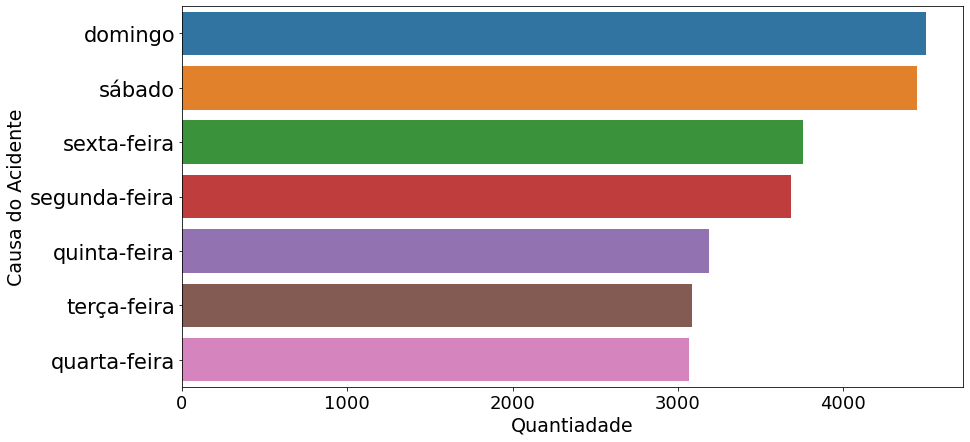

In [14]:
sns.barplot(y=df_grouped_week['dia_semana'], x=df_grouped_week['qtd'], orient="h")
plt.yticks(fontsize=21)
plt.xticks(fontsize=18)
plt.xlabel("Quantiadade", fontsize=19)
plt.ylabel("Causa do Acidente", fontsize=19)
plt.show()

# Cidades com mais acidentes no Brasil

In [15]:
df_grouped_city = df.groupby('municipio').size().rename('qtd').reset_index()

In [16]:
df_grouped_city.sort_values('qtd', inplace=True, ascending=False)

In [17]:
df_grouped_city = df_grouped_city.head(20)

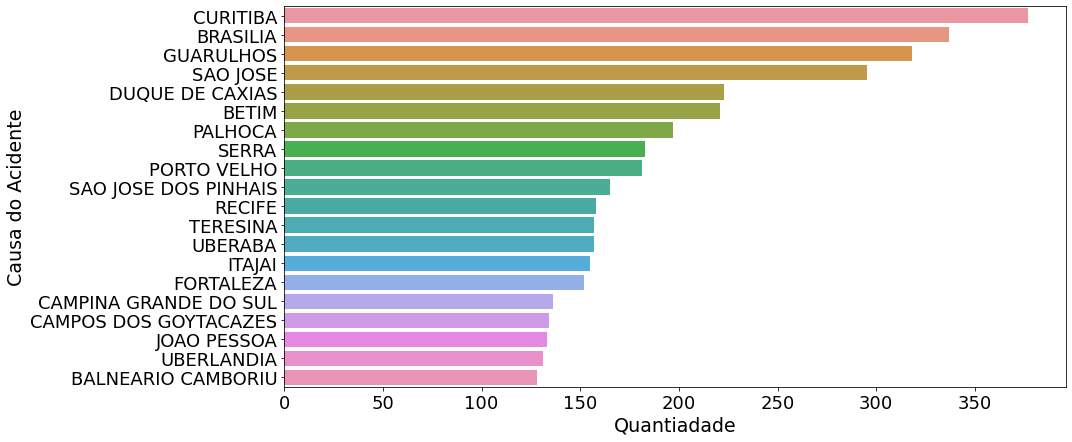

In [18]:
sns.barplot(y=df_grouped_city['municipio'], x=df_grouped_city['qtd'], orient="h")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Quantiadade", fontsize=19)
plt.ylabel("Causa do Acidente", fontsize=19)
plt.show()

# Cidades com mais acidentes por conta de consumo de Álcool

In [19]:
df_alcool = df[df.causa_acidente.str.contains('álcool')]

In [20]:
df_alcool_grouped = df_alcool.groupby('municipio').size().rename('qtd').reset_index()

In [21]:
df_alcool_grouped.sort_values('qtd', inplace=True, ascending=False)

In [22]:
df_alcool_grouped = df_alcool_grouped.head(20)

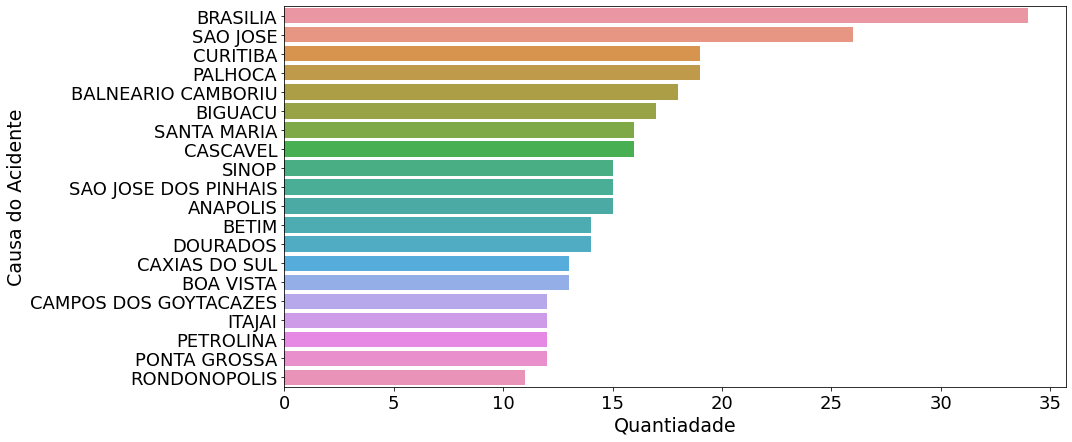

In [23]:
sns.barplot(y=df_alcool_grouped['municipio'], x=df_alcool_grouped['qtd'], orient="h")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Quantiadade", fontsize=19)
plt.ylabel("Causa do Acidente", fontsize=19)
plt.show()

# Condicoes Meteorológicas

In [34]:
df['hora'] = df['horario'].apply(lambda x : x[:2])

In [40]:
df_grouped_2 = df.groupby(['dia_semana', 'hora']).size().rename('qtd').reset_index().sort_values('qtd', ascending=False)

<AxesSubplot:xlabel='hora', ylabel='qtd'>

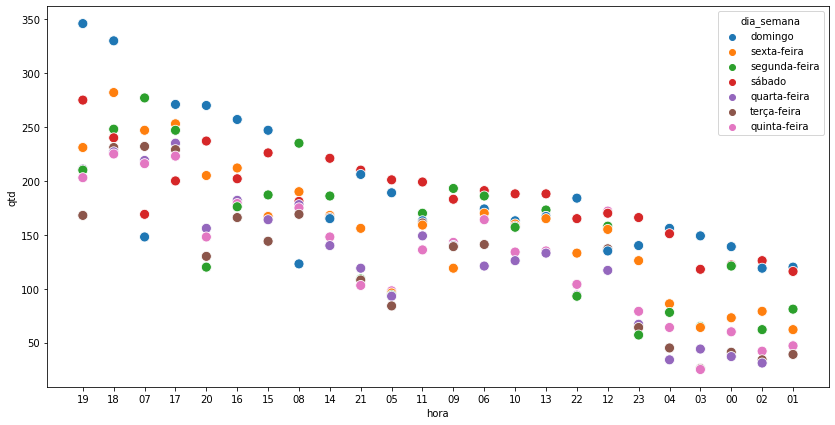

In [43]:
sns.scatterplot(x=df_grouped_2['hora'] , y=df_grouped_2['qtd'], hue=df_grouped_2['dia_semana'], s=100)

In [46]:
df['horario_correto'] = pd.to_datetime(df['horario']).dt.time

In [50]:
df.groupby('horario_correto')

In [77]:
df['acidente_mortal'] = df['mortos'].apply(lambda m : 1 if m > 0 else 0)

In [115]:
def calc_indice_mortalidade(group):
    return round(100*((group.sum()) / (group.shape[0])), 2)

In [140]:
def calcula_mortalidade_por_grupo(coluna_agrupar):
    return df.groupby([coluna_agrupar])['acidente_mortal'] \
        .apply(lambda group : calc_indice_mortalidade(group)) \
        .rename('Percentagem_mortalidade') \
        .reset_index() \
        .sort_values('Percentagem_mortalidade', ascending=False)

In [147]:
df_prop = calcula_mortalidade_por_grupo('tipo_acidente')

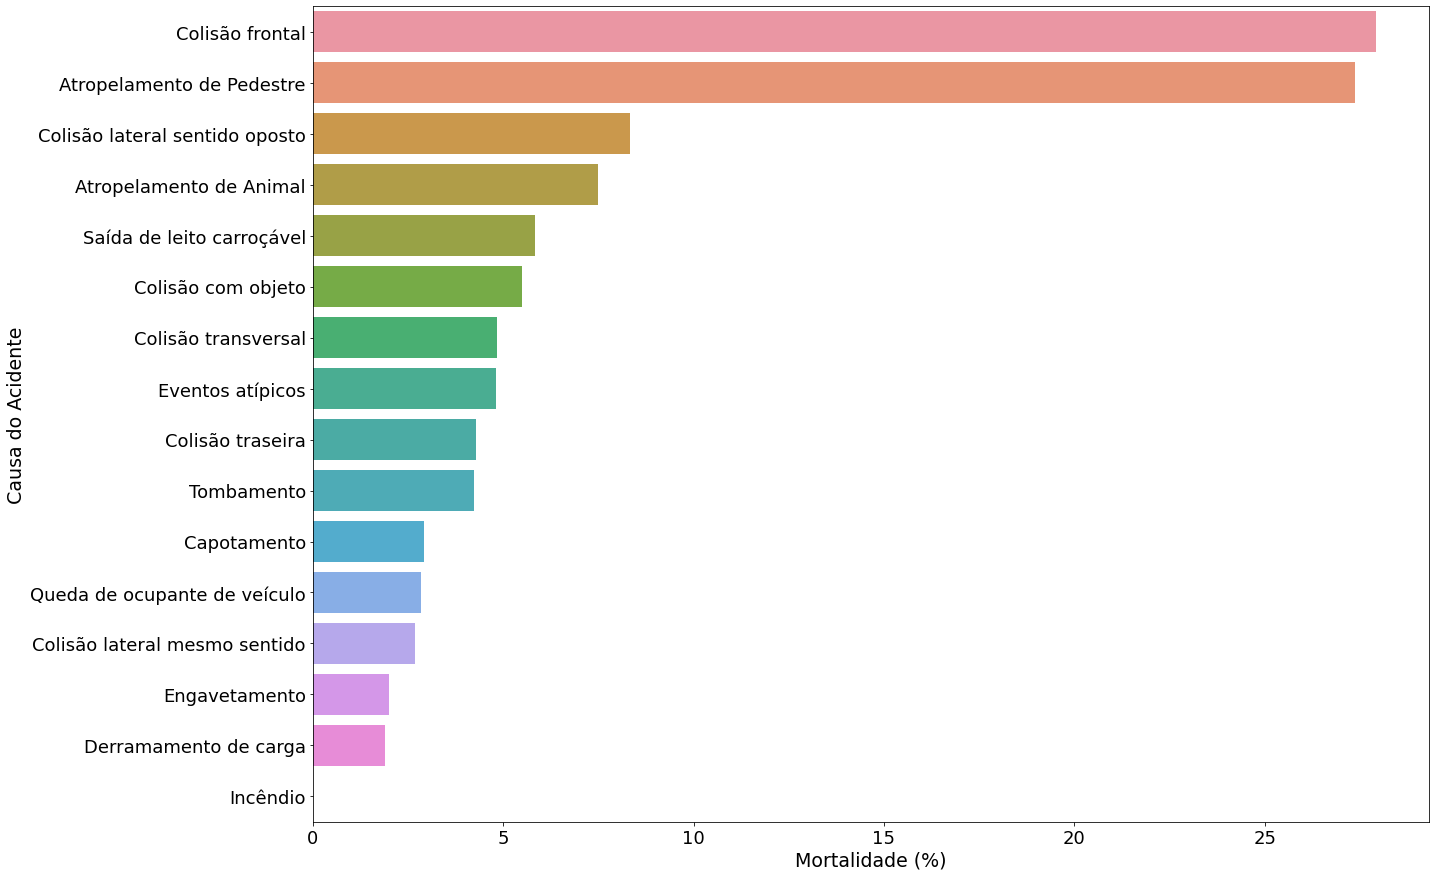

In [149]:
sns.barplot(y=df_prop['tipo_acidente'], x=df_prop['Percentagem_mortalidade'], orient="h")
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel("Mortalidade (%)", fontsize=19)
plt.ylabel("Causa do Acidente", fontsize=19)
plt.show()

In [143]:
df.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'hora', 'horario_correto', 'is_morte',
       'acidente_mortal', 'port_mortalidade'],
      dtype='object')